# Homework 4 solutions

In [2]:
import numpy as np

## 1.

We start by defining a function to return a Hilbert matrix of size $N$

In [2]:
def Hilbert(n):
    """ return a Hilbert matrix, H_ij = (i + j - 1)^{-1} """

    H = np.zeros((n,n), dtype=np.float64)

    for i in range(1, n+1):
        for j in range(1, n+1):
            H[i-1,j-1] = 1.0/(i + j - 1.0)

    return H

Now we'll loop over the matrix size, construct a Hilbert matrix, initialize our vector ${\bf x}$ as:

$${\bf x} = (0, 1, \ldots, N-1)^\intercal$$

and define the righthand side of our linear system as:

$${\bf b} = {\bf H} {\bf x}$$

and then seek the solution:

$${\bf H} \tilde{{\bf x}} = {\bf b}$$

In [9]:
for N in range(2, 16):

    A = Hilbert(N)

    xorig = np.arange(N)
    b = A @ xorig

    x = np.linalg.solve(A, b)

    err = np.max(np.abs(x - xorig))

    if N == 2:
        print("{:^5} {:^20} {:^20}".format("N", "absolute error", "condition number"))

    print("{:5} {:20.10g} {:20.10g}".format(N, err, np.linalg.cond(A, p=1)))

  N      absolute error      condition number  
    2                    0                   27
    3      2.220446049e-16                  748
    4      9.874323581e-13                28375
    5      3.924416347e-12               943656
    6      9.121663425e-10             29070279
    7      1.595682519e-08          985194889.6
    8      1.505452669e-07      3.387279238e+10
    9      2.225784508e-05      1.099651993e+12
   10       0.001948411435      3.535684362e+13
   11       0.002645431441       1.23453552e+15
   12        0.05145843271      4.255909017e+16
   13          7.837144291      7.759900159e+17
   14           22.9019534      9.835692477e+17
   15          18.70912525      1.221413576e+18


We see that when $N$ is around 13 we have an error that is $\mathcal{O}(1)$!

## 2.

Let's start by reading in the data

In [4]:
data = np.loadtxt("signal.txt")

In [6]:
import matplotlib.pyplot as plt

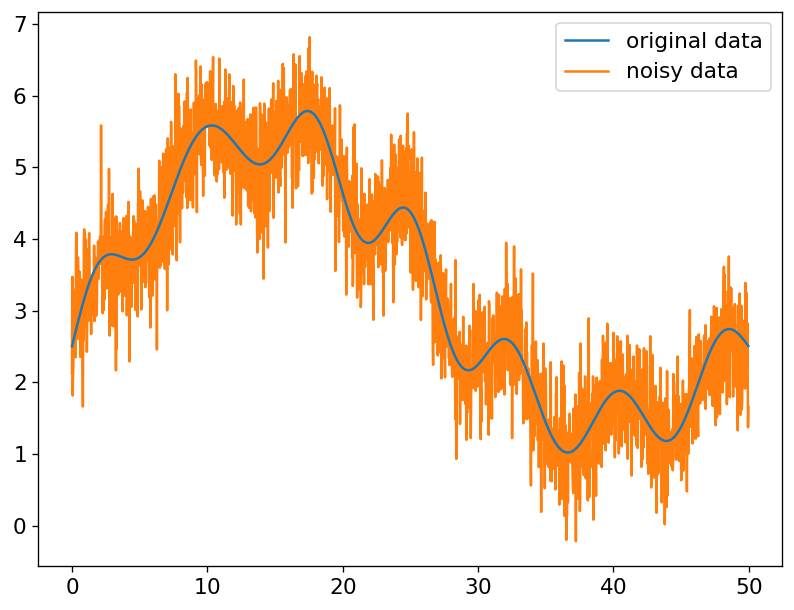

In [8]:
fig, ax = plt.subplots()

ax.plot(data[:,0], data[:,1], label="original data", zorder=100)
ax.plot(data[:,0], data[:,2], label="noisy data")
ax.legend()

We want to do our best to recover the original data from the noisy signal.

In [20]:
x = data[:, 0]
original = data[:, 1]
signal = data[:, 2]

Let's define our smoothing function&mdash;a Gaussian.  We add the function to itself with stride `-` to get something that is symmetric.

In [11]:
def gaussian(x, sigma=0.5):
    """ a gaussian kernel """

    g = 1.0/(sigma*np.sqrt(2.0*np.pi))*np.exp(-0.5*(x/sigma)**2)
    g = g[:] + g[::-1]
    gsum = np.sum(g)
    return g/gsum

In [14]:
kernel = gaussian(x)

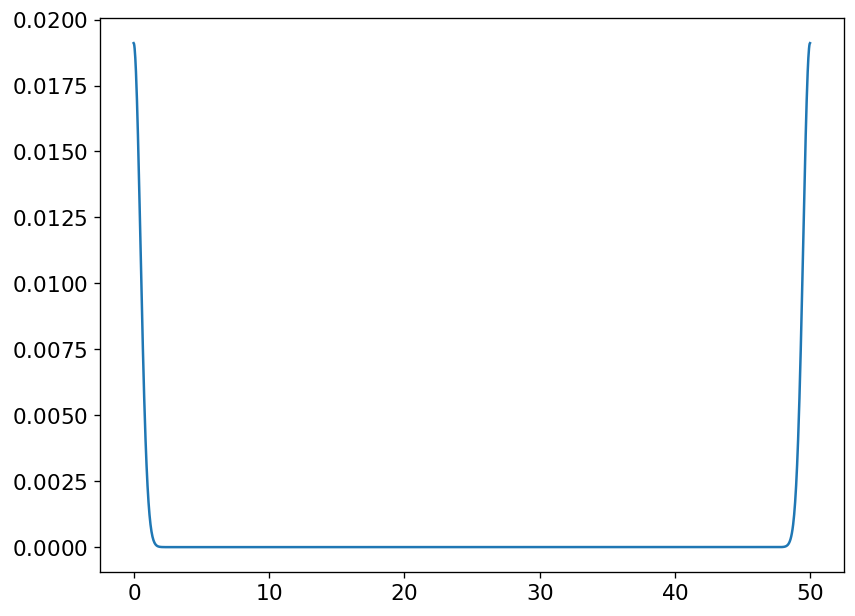

In [15]:
fig, ax = plt.subplots()

ax.plot(x, kernel)

We can see that the amplitude is also quite low&mdash;we normalized it such that the discrete data sums to 1 over the domain.

Now let's take the FFT of both the signal and kernel

In [16]:
fft_signal = np.fft.rfft(signal)
fft_kernel = np.fft.rfft(kernel)

The convolution is just the product of the transforms

In [17]:
conv = fft_signal * fft_kernel

Now let's transform back

In [18]:
smoothed = np.fft.irfft(conv).real

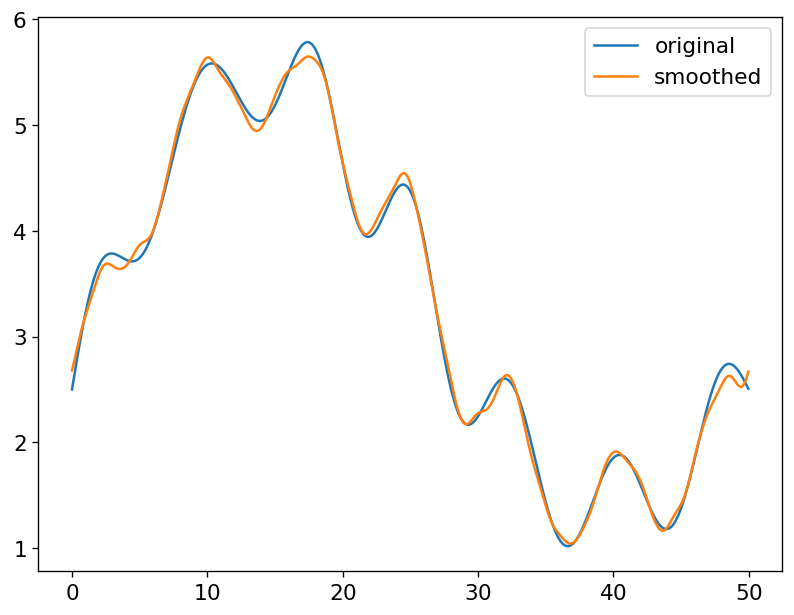

In [21]:
fig, ax = plt.subplots()
ax.plot(x, original, label="original")
ax.plot(x, smoothed, label="smoothed")
ax.legend()

We see that the smoothed data looks quite clean and agrees with the original data very well.